In [1]:
import pandas as pd

In [2]:
import os

In [3]:
ADHD_file_prefix = "../English/Adhd_eng/"
anxiety_file_prefix = "../English/Anxiety_eng/"
ASD_file_prefix = "../English/Asd_eng/"
bipolar_file_prefix = "../English/Bipolar_eng/"
control_file_prefix = "../English/Control_eng/"
depression_file_prefix = "../English/Depression_eng/"
eating_file_prefix = "../English/Eating_eng/"
ocd_file_prefix = "../English/Ocd_eng/"
ptsd_file_prefix = "../English/Ptsd_eng/"
schizophrenia_file_prefix = "../English/Schizophrenia_eng/"

# List files in each folder
ADHD_list = os.listdir(ADHD_file_prefix)
anxiety_list = os.listdir(anxiety_file_prefix)
ASD_list = os.listdir(ASD_file_prefix)
bipolar_list = os.listdir(bipolar_file_prefix)
control_list = os.listdir(control_file_prefix)
depression_list = os.listdir(depression_file_prefix)
eating_list = os.listdir(eating_file_prefix)
ocd_list = os.listdir(ocd_file_prefix)
ptsd_list = os.listdir(ptsd_file_prefix)
schizophrenia_list = os.listdir(schizophrenia_file_prefix)

In [4]:
def read_data(file_prefix, file_list):
    print("At Disorder: ", file_prefix)
    data = pd.read_csv(file_prefix + file_list[0])
    for file_dir in file_list[1:]:
        item = pd.read_csv(file_prefix + file_dir)
        data = pd.concat([data, item], ignore_index=True)

    return data

In [5]:
ADHD_data = read_data(ADHD_file_prefix, ADHD_list)
anxiety_data = read_data(anxiety_file_prefix, anxiety_list)
ASD_data = read_data(ASD_file_prefix, ASD_list)
bipolar_data = read_data(bipolar_file_prefix, bipolar_list)
control_data = read_data(control_file_prefix, control_list)
depression_data = read_data(depression_file_prefix, depression_list)
eating_data = read_data(eating_file_prefix, eating_list)
ocd_data = read_data(ocd_file_prefix, ocd_list)
ptsd_data = read_data(ptsd_file_prefix, ptsd_list)
schizophrenia_data = read_data(schizophrenia_file_prefix, schizophrenia_list)

At Disorder:  ../English/Adhd_eng/
At Disorder:  ../English/Anxiety_eng/
At Disorder:  ../English/Asd_eng/
At Disorder:  ../English/Bipolar_eng/
At Disorder:  ../English/Control_eng/
At Disorder:  ../English/Depression_eng/
At Disorder:  ../English/Eating_eng/
At Disorder:  ../English/Ocd_eng/
At Disorder:  ../English/Ptsd_eng/
At Disorder:  ../English/Schizophrenia_eng/


In [6]:
import matplotlib.pyplot as plt
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from string import punctuation

In [7]:
def clean_tweets(all_tweets):
    # Define the list of punctuation marks to remove
    remove_punctuation = list(punctuation)
    remove_punctuation.extend(["@user", "user", "httpurl", "``", "''", "'s", "n't", "'m", "'re", "'ve", "'ll", "'d"])

    # Convert all tweets to lowercase and remove punctuation
    posts = [tweet.lower() for tweet in all_tweets]

    # Tokenize the tweets into individual words
    tweets_tokenized = [word_tokenize(post) for post in posts]

    # Remove stop words and punctuation from the list of words
    stop_words = set(stopwords.words('english'))
    tweets_cleaned = [[word for word in tweet if word not in stop_words and word not in remove_punctuation] for tweet in tweets_tokenized]

    return tweets_cleaned

In [8]:
def count_most_common(all_tweets):
    
    tweets_cleaned = clean_tweets(all_tweets)

    word_counts = Counter(word for tweet in tweets_cleaned for word in tweet)
    most_common_ten = word_counts.most_common(10)

    return most_common_ten

In [ ]:
def create_most_common_graph(data, title, disorder):
    print("At disorder: ", disorder)
    # Extract the words and frequencies
    most_common_ten = count_most_common(data['tweet'])

    x_words = [word for word, freq in most_common_ten]
    y_frequencies = [freq for word, freq in most_common_ten]

    # Create a bar chart of the most common words and their frequencies
    fig = plt.figure(figsize=(10, 5))
    plt.bar(x_words, y_frequencies)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

    fig.savefig(f'../graphs/most_common_words/{disorder}_most_common_words.png', transparent=True)

At disorder:  anxiety


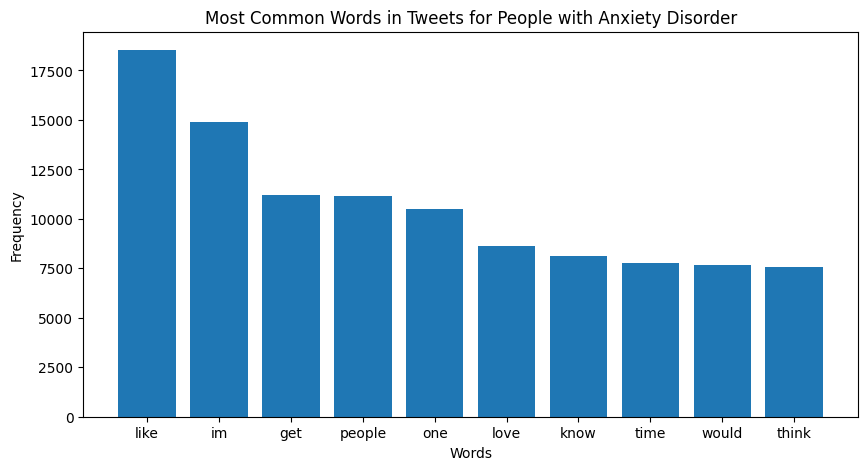

At disorder:  ADHD


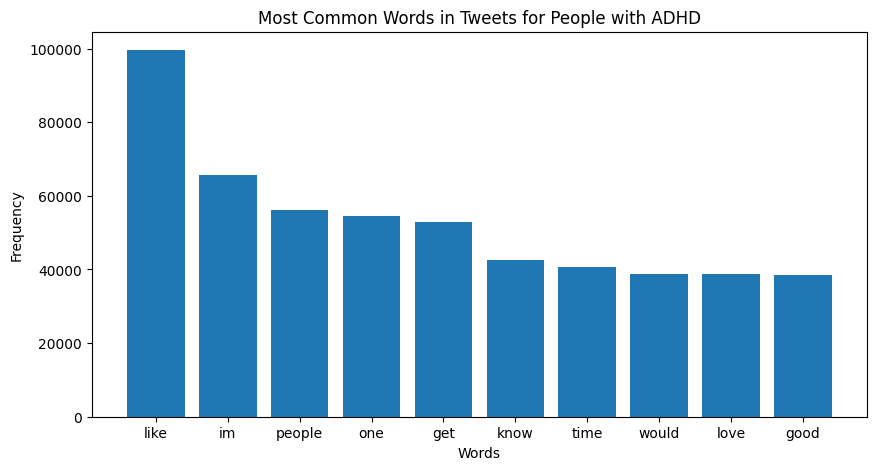

At disorder:  ASD


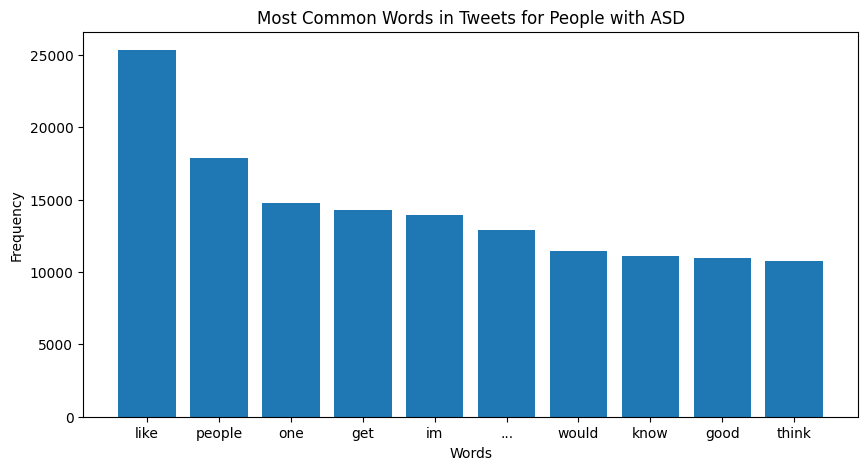

At disorder:  bipolar


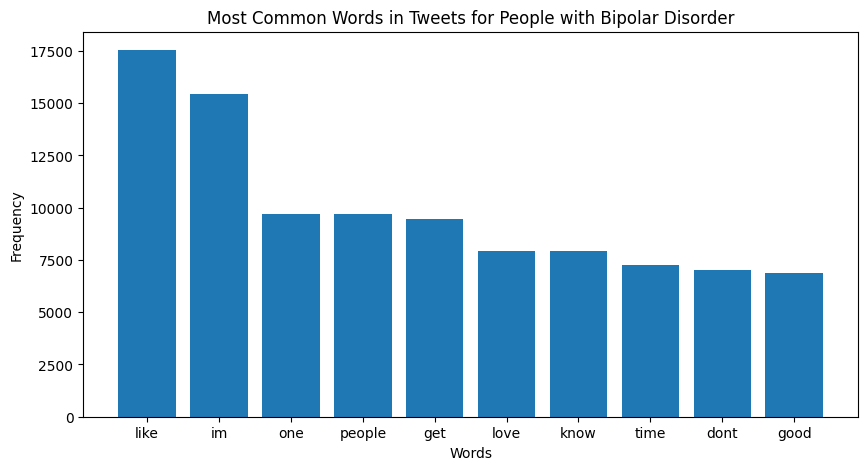

At disorder:  depression


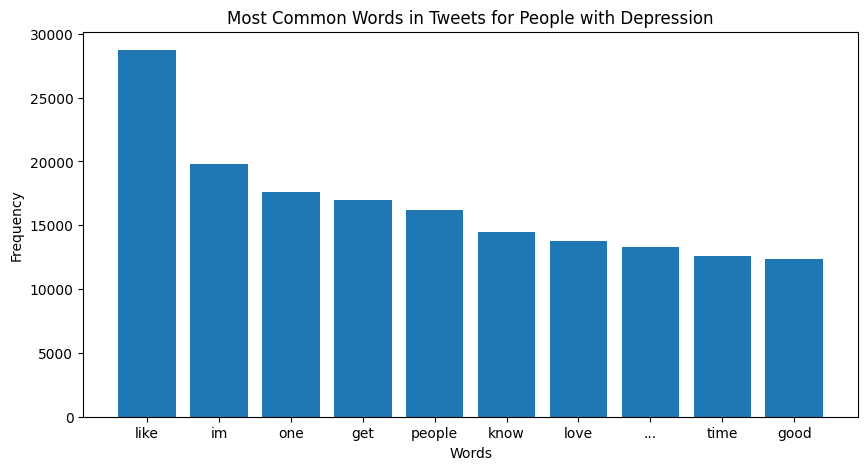

At disorder:  eating


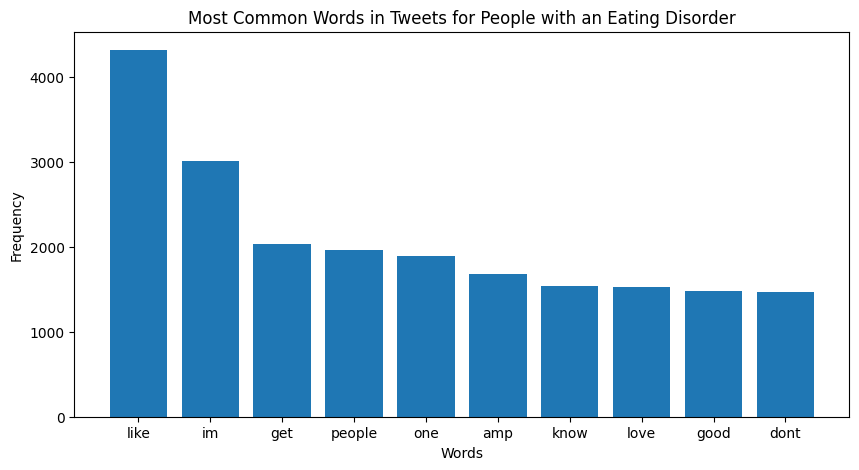

At disorder:  ocd


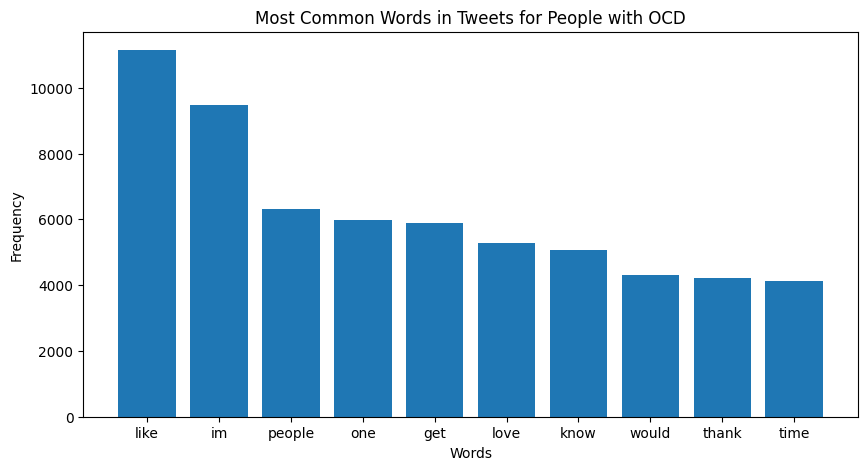

At disorder:  ptsd


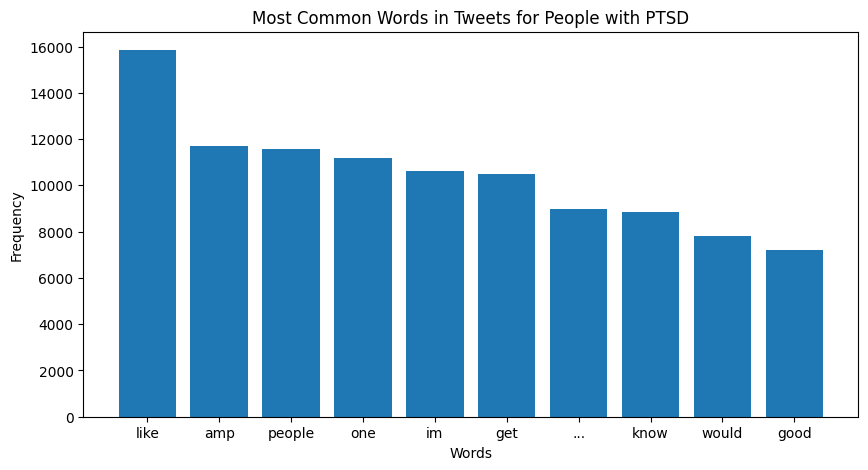

At disorder:  schizophrenia


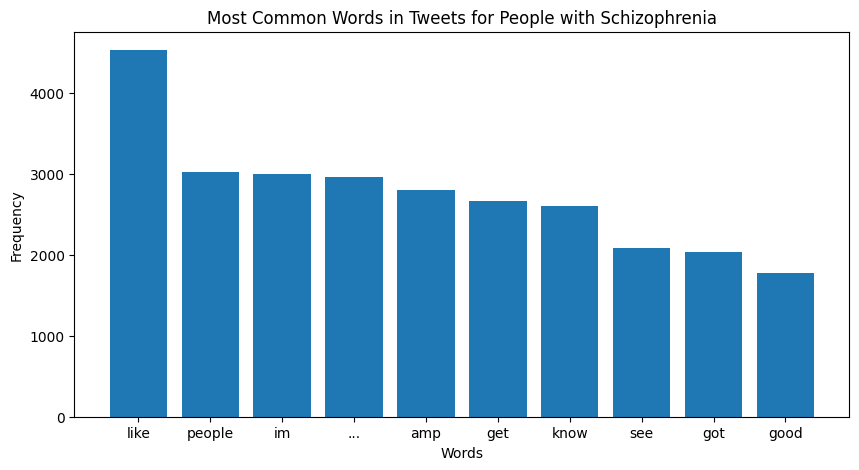

In [ ]:
create_most_common_graph(ADHD_data, 'Most Common Words in Tweets for People with ADHD', 'ADHD')
create_most_common_graph(anxiety_data, 'Most Common Words in Tweets for People with Anxiety Disorder', 'anxiety')
create_most_common_graph(ASD_data, 'Most Common Words in Tweets for People with ASD', 'ASD')
create_most_common_graph(bipolar_data, 'Most Common Words in Tweets for People with Bipolar Disorder', 'bipolar')
create_most_common_graph(depression_data, 'Most Common Words in Tweets for People with Depression', 'depression')
create_most_common_graph(eating_data, 'Most Common Words in Tweets for People with an Eating Disorder', 'eating')
create_most_common_graph(ocd_data, 'Most Common Words in Tweets for People with OCD', 'ocd')
create_most_common_graph(ptsd_data, 'Most Common Words in Tweets for People with PTSD', 'ptsd')
create_most_common_graph(schizophrenia_data, 'Most Common Words in Tweets for People with Schizophrenia', 'schizophrenia')

At disorder:  control


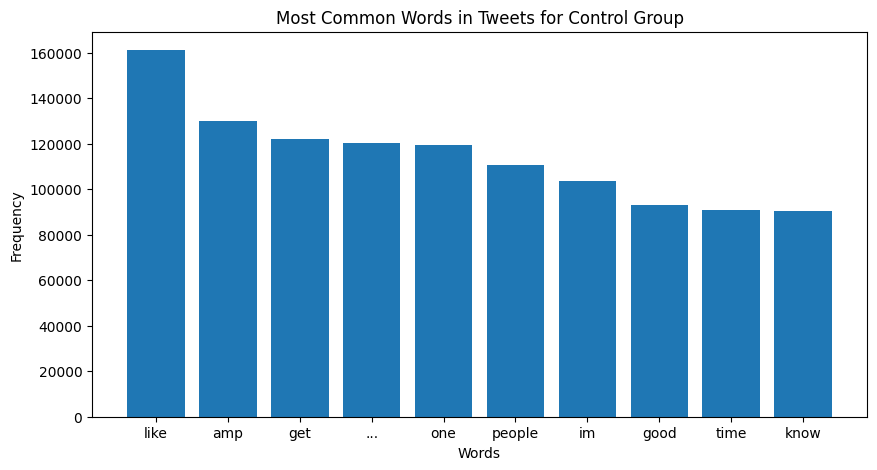

In [ ]:
# This is separate because the control group is not a disorder, and there are many more datapoints in the control group

create_most_common_graph(control_data, 'Most Common Words in Tweets for Control Group', 'control')

In [32]:
def analyze_parts_of_speech(all_tweets):
    tokenized_clean = clean_tweets(all_tweets)

    #nltk.download('averaged_perceptron_tagger_eng')

    adjective_count = 0
    verb_tense_count = {'past': 0, 'present': 0, 'future': 0}
    noun_count = 0
    adverb_count = 0
    pronoun_count = 0
    preposition_count = 0
    conjunction_count = 0

    for tokens in tokenized_clean:
        tagged_tokens = pos_tag(tokens)

        for token, tag in tagged_tokens:
            if tag in ['JJ', 'JJR', 'JJS']:  # Adjectives
                adjective_count += 1
            elif tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:  # Verbs
                if tag == 'VBD':  # Past tense
                    verb_tense_count['past'] += 1
                elif tag == 'VBP':  # Present tense
                    verb_tense_count['present'] += 1
                elif tag == 'VBZ':  # Future tense
                    verb_tense_count['future'] += 1
            elif tag in ['NN', 'NNS', 'NNP', 'NNPS']:  # Nouns
                noun_count += 1
            elif tag in ['RB', 'RBR', 'RBS']:  # Adverbs
                adverb_count += 1
            elif tag in ['PRP', 'PRP$']:  # Pronouns
                pronoun_count += 1
            elif tag in ['IN', 'TO']:  # Prepositions
                preposition_count += 1
            elif tag in ['CC', 'IN']:  # Conjunctions
                conjunction_count += 1

    return [adjective_count, noun_count, adverb_count, pronoun_count, preposition_count, conjunction_count, verb_tense_count]

In [38]:
def graph_parts_of_speech(all_tweets, disorder, title):
    # Prepare data
    print("At disorder: ", disorder)
    parts_of_speech = ['Adjectives', 'Nouns', 'Adverbs', 'Pronouns', 'Prepositions', 'Conjunctions', 'Verbs']
    counts = analyze_parts_of_speech(all_tweets)
    verb_tense_count = counts.pop()  # Assuming this returns a dict with verb tense counts

    # Prepare verb tense data
    verb_tenses = ['Past', 'Present', 'Future']
    verb_counts = [verb_tense_count['past'], verb_tense_count['present'], verb_tense_count['future']]
    
    # Create a bar graph for parts of speech
    fig = plt.figure(figsize=(10, 5))
    
    # Plot parts of speech counts
    bars = plt.bar(parts_of_speech[:-1], counts)  # Exclude 'Verbs' for the first bar plot

    # Create stacked bars for verb tenses
    plt.bar(parts_of_speech[-1], verb_counts[0], label='Past', color='dodgerblue')  # Past
    plt.bar(parts_of_speech[-1], verb_counts[1], bottom=verb_counts[0], label='Present', color='royalblue')  # Present
    plt.bar(parts_of_speech[-1], verb_counts[2], bottom=[verb_counts[0] + verb_counts[1]], label='Future', color='deepskyblue')  # Future

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Parts of Speech')
    plt.ylabel('Frequency')
    plt.legend(title='Verb Tenses')

    # Show the plot
    plt.tight_layout()
    plt.show()

    fig.savefig(f'../graphs/parts_of_speech/{disorder}_parts_of_speech.png', transparent=True)

At disorder:  ADHD


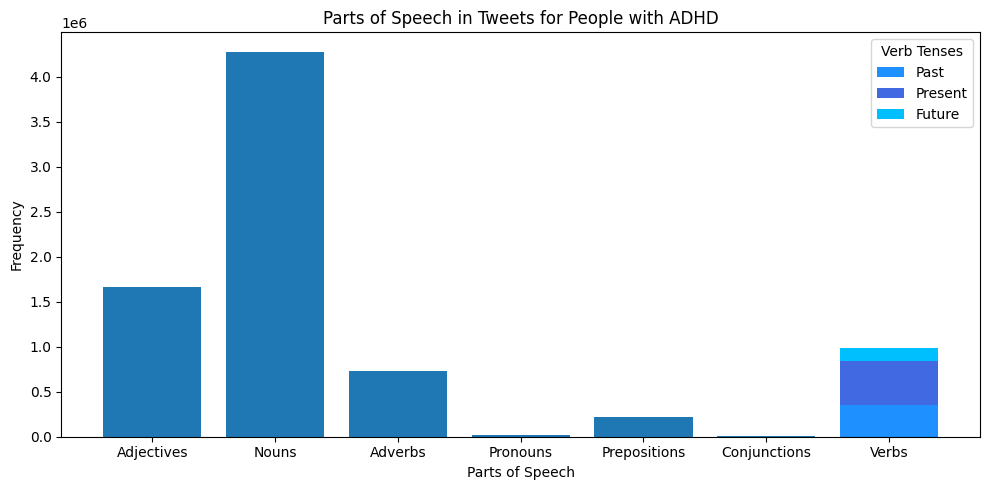

At disorder:  anxiety


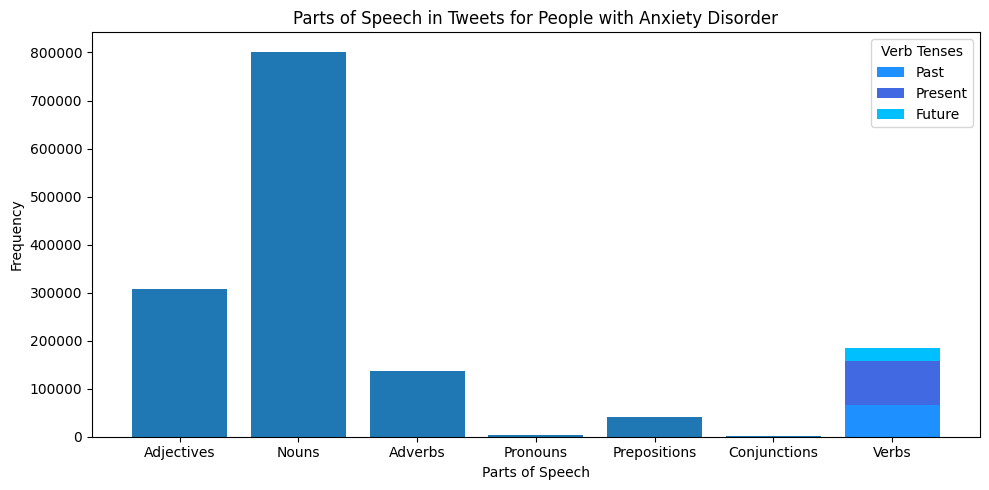

At disorder:  ASD


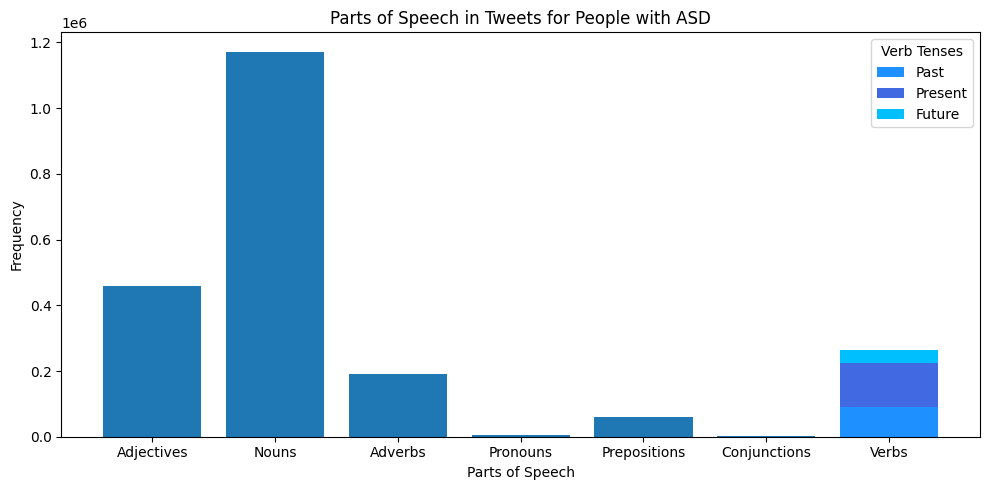

At disorder:  bipolar


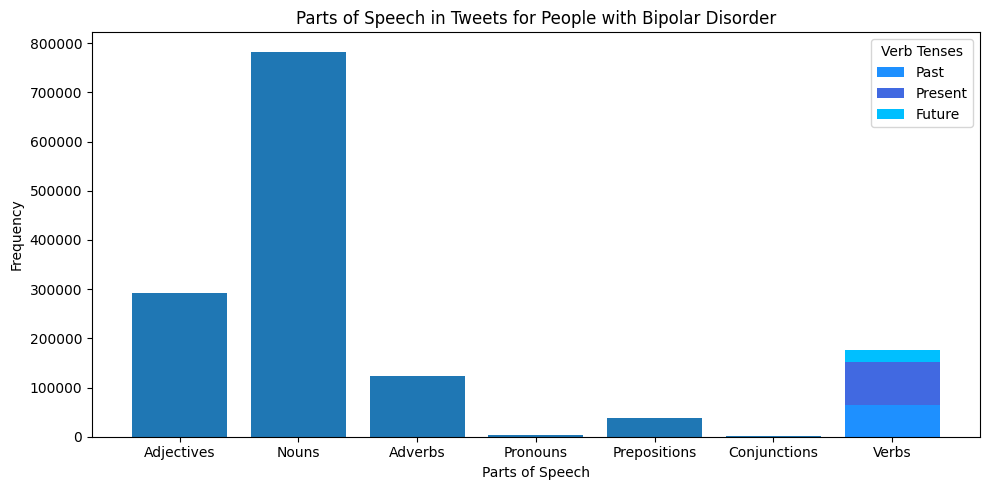

At disorder:  depression


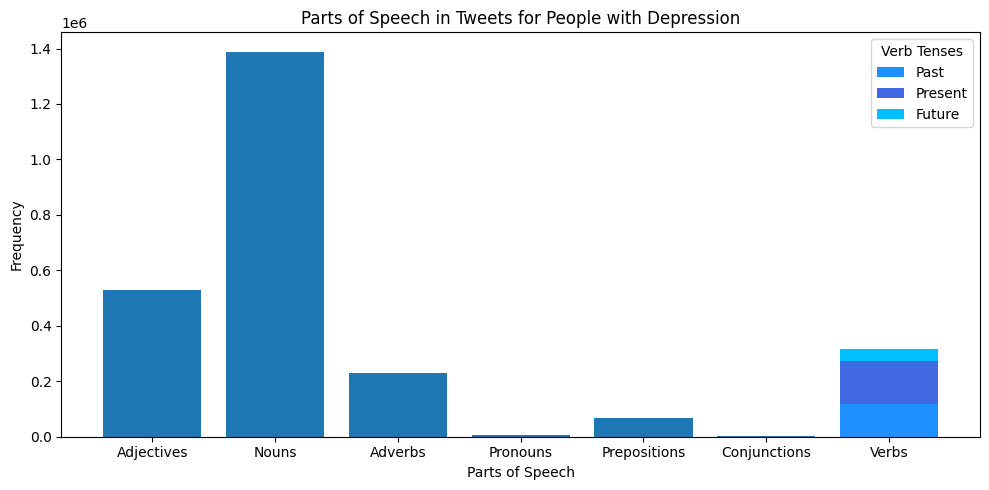

At disorder:  eating


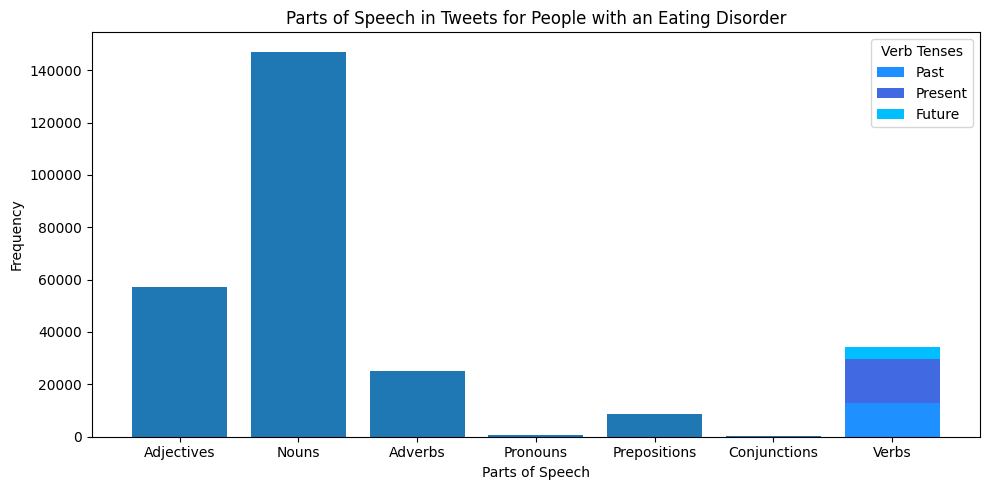

At disorder:  ocd


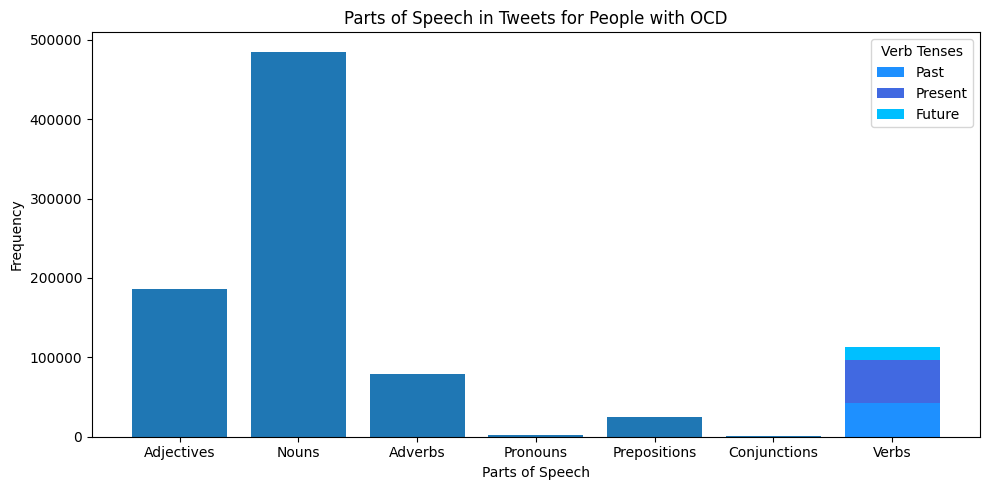

At disorder:  ptsd


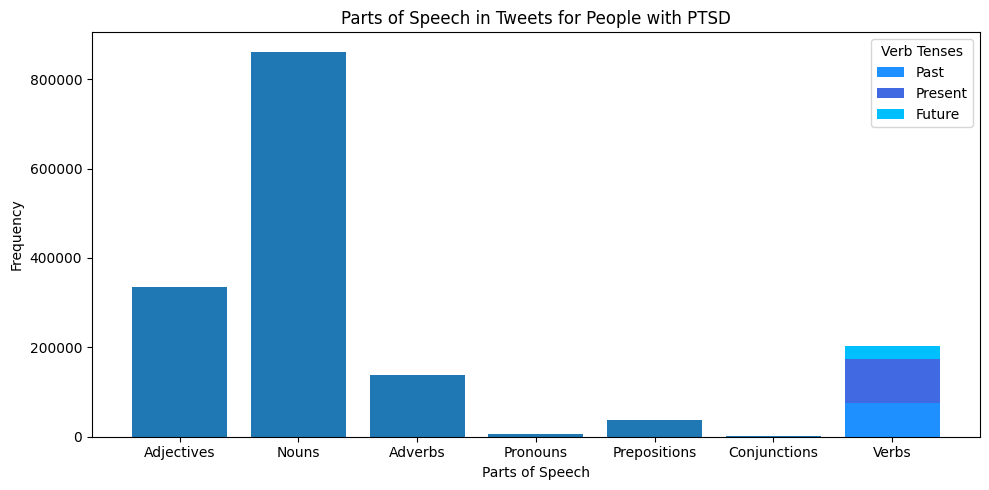

At disorder:  schizophrenia


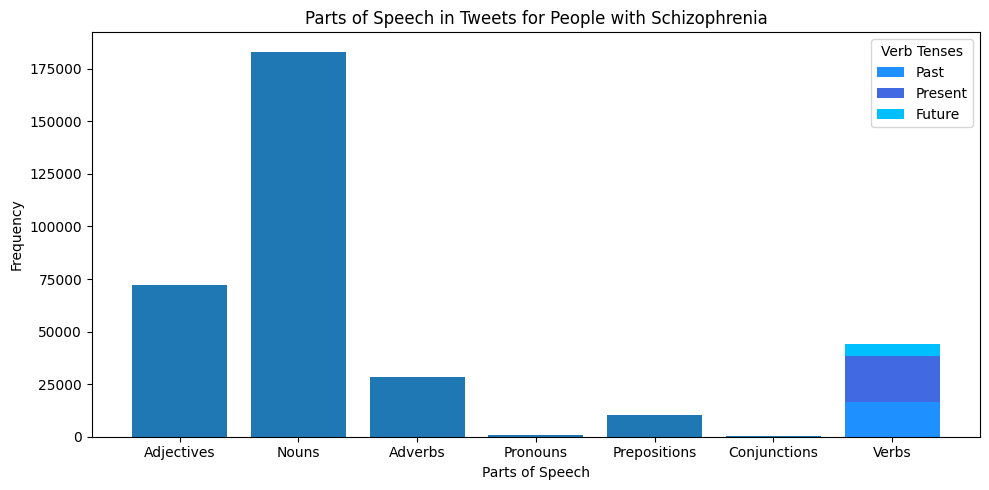

In [37]:
graph_parts_of_speech(ADHD_data['tweet'], 'ADHD', 'Parts of Speech in Tweets for People with ADHD')
graph_parts_of_speech(anxiety_data['tweet'], 'anxiety', 'Parts of Speech in Tweets for People with Anxiety Disorder')
graph_parts_of_speech(ASD_data['tweet'], 'ASD', 'Parts of Speech in Tweets for People with ASD')
graph_parts_of_speech(bipolar_data['tweet'], 'bipolar', 'Parts of Speech in Tweets for People with Bipolar Disorder')
graph_parts_of_speech(depression_data['tweet'], 'depression', 'Parts of Speech in Tweets for People with Depression')
graph_parts_of_speech(eating_data['tweet'], 'eating', 'Parts of Speech in Tweets for People with an Eating Disorder')
graph_parts_of_speech(ocd_data['tweet'], 'ocd', 'Parts of Speech in Tweets for People with OCD')
graph_parts_of_speech(ptsd_data['tweet'], 'ptsd', 'Parts of Speech in Tweets for People with PTSD')
graph_parts_of_speech(schizophrenia_data['tweet'], 'schizophrenia', 'Parts of Speech in Tweets for People with Schizophrenia')